In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px
import requests
import os, sys
print(os.getcwd())

/home/egis/Dropbox/Mokymai/PythonDSComplete/PROJECTS/AI


In [2]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='bmh')

In [3]:
def getPDxlsx(f):
    return pd.read_excel(f)

B2B_gv = pd.read_excel('b2b_gv_vartojimas.xlsx')
B2B_ngv = pd.read_excel('b2b_ngv_vartojimas.xlsx')
B2C_gv = pd.read_excel('b2c_gv_vartojimas.xlsx')
B2C_ngv = pd.read_excel('b2c_ngv_vartojimas.xlsx')
ALL = {'B2B NGV':B2B_ngv, 'B2B GV':B2B_gv, 'B2C NGV':B2C_ngv, 'B2C GV':B2C_gv}

In [4]:
for df in ALL.values():
    print(df.iloc[:,[0,1,2,3]].head(2))
    print('#'*15)

         data_valanda    0  1      2
0 2022-11-01 00:00:00  0.0  0  0.014
1 2022-11-01 01:00:00  0.0  0  0.013
###############
         data_valanda    0    1     2
0 2022-11-01 00:00:00  0.0  0.0  4.68
1 2022-11-01 01:00:00  0.0  0.0  4.34
###############
             dateTime      0      1      2
0 2023-08-01 00:00:00  0.117  0.103  0.041
1 2023-08-01 01:00:00  0.501  0.043  0.046
###############
             dateTime      0      1      2
0 2023-08-01 00:00:00  1.128  0.301  0.078
1 2023-08-01 01:00:00  1.465  0.262  0.095
###############


In [5]:
for i in ALL.values():
    i.info()
    c = list(i.columns)
    c[0] = 'data_valanda'
    i.columns = c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 800 entries, data_valanda to 798
dtypes: datetime64[ns](1), float64(780), int64(19)
memory usage: 53.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 764 entries, data_valanda to 762
dtypes: datetime64[ns](1), float64(763)
memory usage: 51.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Columns: 1027 entries, dateTime to 1025
dtypes: datetime64[ns](1), float64(1024), int64(2)
memory usage: 17.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Columns: 1051 entries, dateTime to 1049
dtypes: datetime64[ns](1), float64(1050)
memory usage: 17.5 MB


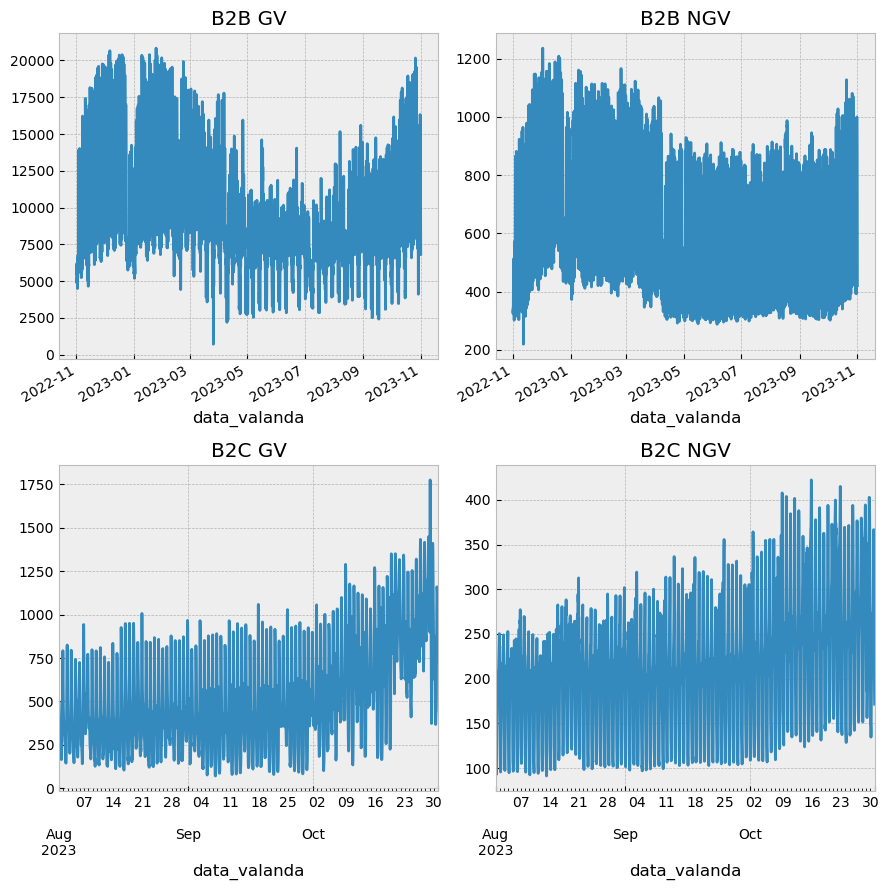

In [6]:
# pradinis duomenų analizavimas:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(9,9), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:
B2B_gv.copy().set_index('data_valanda').sum(numeric_only=True, axis=1).plot(ax=ax1)
ax1.set_title('B2B GV')

#ax1.legend(loc='best')
#ax2:
#plotting code:
B2B_ngv.copy().set_index('data_valanda').sum(numeric_only=True, axis=1).plot(ax=ax2)
ax2.set_title('B2B NGV')

#ax2.legend(loc='best')
#ax3:
#plotting code:
B2C_gv.copy().set_index('data_valanda').sum(numeric_only=True, axis=1).plot(ax=ax3)
ax3.set_title('B2C GV')

#ax3.legend(loc='best')
#ax4:
#plotting code:
B2C_ngv.copy().set_index('data_valanda').sum(numeric_only=True, axis=1).plot(ax=ax4)
ax4.set_title('B2C NGV')

#ax4.legend(loc='best')
fig.tight_layout()
plt.show()

In [7]:
#Lentelės, kur eilutės susumuotos (= gautas bendras tą valandą suvartotos energijos kiekis kiekvienai vartotojų grupei)
b2b_gv = B2B_gv.set_index('data_valanda').sum(numeric_only=True, axis=1).reset_index(); b2b_gv.head(2)
b2b_ngv = B2B_ngv.set_index('data_valanda').sum(numeric_only=True, axis=1).reset_index(); b2b_ngv.head(2)
b2c_gv = B2C_gv.set_index('data_valanda').sum(numeric_only=True, axis=1).reset_index(); b2c_gv.head(2)
b2c_ngv = B2C_ngv.set_index('data_valanda').sum(numeric_only=True, axis=1).reset_index(); b2c_ngv.head(2)
all = {'b2b ngv': b2b_ngv, 'b2b gv': b2b_gv, 'b2c ngv': b2c_ngv, 'b2c gv': b2c_gv}

In [8]:
for i in all.values():
    c = list(i.columns)
    c[-1] = 'Consumption'
    i.columns = c
    i.info()
# atminties ir resursų sumažinimas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_valanda  8760 non-null   datetime64[ns]
 1   Consumption   8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_valanda  8760 non-null   datetime64[ns]
 1   Consumption   8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_valanda  2185 non-null   datetime64[ns]
 1   Consu

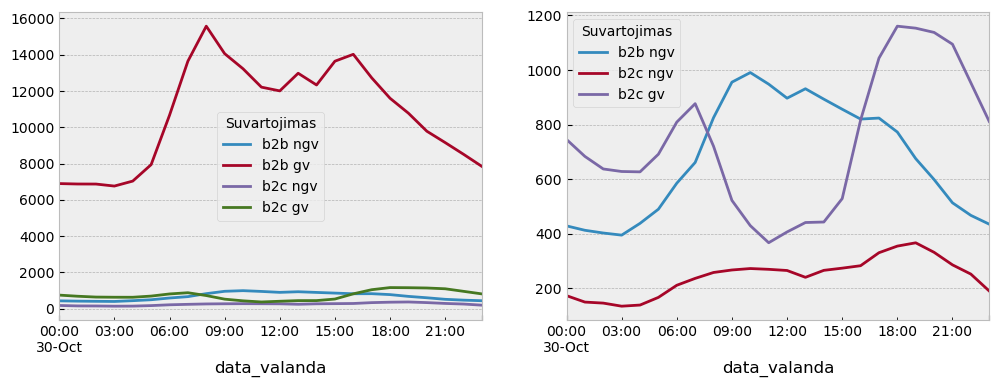

In [9]:
# vienos dienos duomenų atsivaizdavimas:
month = 10
day = 30
fig, (ax, ax2) = plt.subplots(1,2, figsize=[12,4])
for key, df in all.items():
    df[(df['data_valanda'].dt.month == month)& (df['data_valanda'].dt.day == day)].plot(ax=ax, label=key, x='data_valanda', y='Consumption')
    if key != 'b2b gv':
        df[(df['data_valanda'].dt.month == month)& (df['data_valanda'].dt.day == day)].plot(ax=ax2, label=key, x='data_valanda', y='Consumption')
ax.legend(loc='best', title='Suvartojimas')
ax2.legend(loc='best', title='Suvartojimas')
plt.show()

In [10]:
#Testinis klausimas - kiek visi vartotojai suvartojo per 2023 metų spalio mėnesį energijos?
month = 10
c_ = {}
for key, df in all.items():
    s = df[df['data_valanda'].dt.month == month].sum(numeric_only=True).sum()
    print(key, s)
    c_[key] = s
ss = sum(c_.values())
print(f'{ss} kWh')
#laikant, jog buvo pateikta duomenys kWh
# tai visa suvartota spalį energija MWh:
print(f'{ss/1000} MWh')
print(f'{ss/1e6} GWh')
# tai sudaro tik dalį per visą spalį suvartotos energijos:
print(f'{ss/1e6/1017*100.0} % dalis per 2023 spalį')

################################
#laikant, jog buvo pateikta duomenyse MWh
# tai visa suvartota spalį energija GWh:
print(f'{ss/1000} GWh')
# tai sudaro šią dalį per visą spalį suvartotos energijos:
print(f'{ss/1000/1017*100.0} % - wrong, dalis per 2023 spalį') # NOPE, 825 % negali būti.

####################
# Reiškia, jog šiuose duomenyse nėra 99.175 % LT vartotojų !!!

b2b ngv 445801.16260599974
b2b gv 7251137.088531001
b2c ngv 179482.68817137135
b2c gv 522053.60941189725
8398474.548720269 kWh
8398.474548720269 MWh
8.398474548720268 GWh
0.8258087068554836 % dalis per 2023 spalį
8398.474548720269 GWh
825.8087068554836 % - wrong, dalis per 2023 spalį


In [11]:
for key, df in all.items():
    df['YY'] = df['data_valanda'].dt.year
    df['MM'] = df['data_valanda'].dt.month
    df['dd'] = df['data_valanda'].dt.day
    df['ddweek'] = df['data_valanda'].dt.day_of_week
    df['H'] = df['data_valanda'].dt.hour
b2b_gv.head(2)   

,data_valanda,Consumption,YY,MM,dd,ddweek,H
0,2022-11-01 00:00:00,5067.686718,2022,11,1,1,0
1,2022-11-01 01:00:00,4934.976191,2022,11,1,1,1


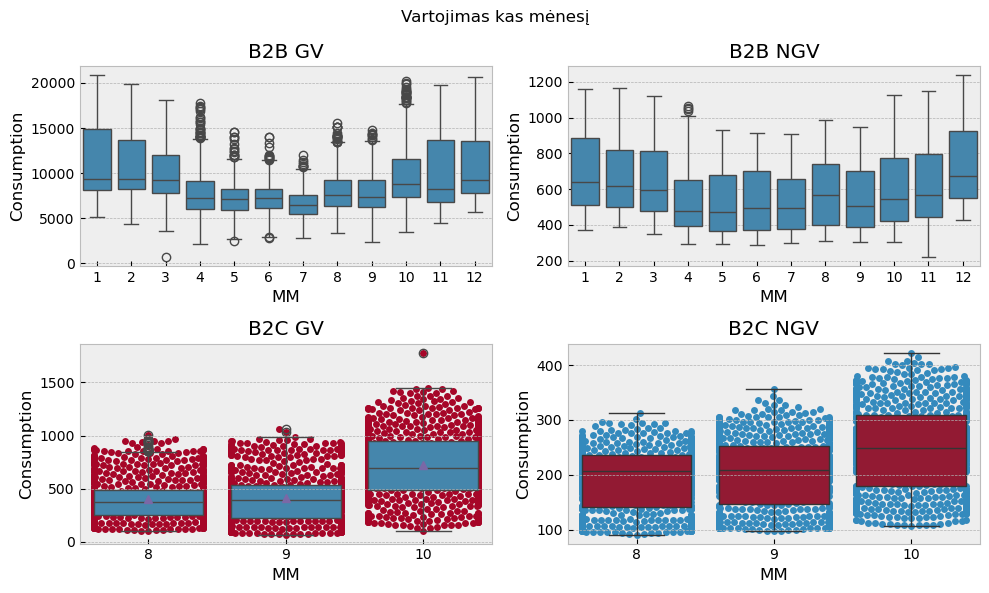

In [12]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(10,6), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})
#ax1:
#plotting code:
sns.boxplot(data=b2b_gv, x='MM', y='Consumption', ax=ax1)
ax1.set_title('B2B GV')
#ax1.legend(loc='best')
#ax2:
#plotting code:
sns.boxplot(data=b2b_ngv, x='MM', y='Consumption', ax=ax2)
ax2.set_title('B2B NGV')
#ax2.legend(loc='best')
#ax3:
#plotting code:
sns.boxplot(data=b2c_gv, x='MM', y='Consumption', ax=ax3, zorder=1, showmeans=True)
sns.swarmplot(data=b2c_gv, x='MM', y='Consumption', ax=ax3, zorder=0)
ax3.set_title('B2C GV')
#ax3.legend(loc='best')
#ax4:
#plotting code:
sns.swarmplot(data=b2c_ngv, x='MM', y='Consumption', ax=ax4, zorder=0)
sns.boxplot(data=b2c_ngv, x='MM', y='Consumption', ax=ax4, zorder=1)
ax4.set_title('B2C NGV')
#ax4.legend(loc='best')
fig.suptitle('Vartojimas kas mėnesį')
fig.tight_layout()
plt.show()

In [13]:
orai = pd.DataFrame()
if os.path.isfile('orai.csv'):
    orai = pd.read_csv('orai.csv')
    orai['observationTimeUtc'] = pd.to_datetime(orai['observationTimeUtc'])
    print('iš failo')
else:
    urlt = 'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/{d}'
    # ~ 10 min
    from datetime import date, timedelta
    import time
    sdate = date(2022,11,1)   # start date
    edate = date(2023,11,1)   # end date
    dates = pd.date_range(sdate,edate-timedelta(days=1),freq='d').astype(str).to_list()
    orai = []
    print(len(dates))
    i = 1
    for d in dates:
        url = urlt.format(d=d)
        a = requests.get(url)
        if a.status_code == 200:
            r = a.json()
            df = pd.DataFrame(data=r['observations'])
            orai.append(df)
        else:
            print(a.status_code)
            continue
        time.sleep(0.5) # neviršyti 180 req/s
        print(f'{len(dates)-i} liko', end='\r')
        i = i + 1
    orai = pd.concat(orai, ignore_index=True)
    orai.info()
    orai.to_csv('orai.csv')


iš failo


In [14]:
orai['observationTimeUtc'] = pd.to_datetime(orai['observationTimeUtc'])
b2b_gv = pd.merge(left = b2b_gv, right=orai, left_on='data_valanda', right_on='observationTimeUtc', how='inner')
b2b_ngv = pd.merge(left=b2b_ngv, right=orai, left_on='data_valanda', right_on='observationTimeUtc', how='inner')
b2c_gv = pd.merge(left=b2c_gv, right=orai, left_on='data_valanda', right_on='observationTimeUtc', how='inner')
b2c_ngv = pd.merge(left=b2c_ngv, right=orai, left_on='data_valanda', right_on='observationTimeUtc', how='inner')
all = {'b2b ngv': b2b_ngv, 'b2b gv': b2b_gv, 'b2c ngv': b2c_ngv, 'b2c gv': b2c_gv}
for k, df in all.items():
    print(df.head(1))
    print('#'*35)

  data_valanda  Consumption    YY  MM  dd  ddweek  H  Unnamed: 0  \
0   2022-11-01    341.15068  2022  11   1       1  0           0   

  observationTimeUtc  airTemperature  feelsLikeTemperature  windSpeed  \
0         2022-11-01             1.8                   0.3        1.5   

   windGust  windDirection  cloudCover  seaLevelPressure  relativeHumidity  \
0       2.2            151        88.0            1022.2                94   

   precipitation conditionCode  
0            0.0        cloudy  
###################################
  data_valanda  Consumption    YY  MM  dd  ddweek  H  Unnamed: 0  \
0   2022-11-01  5067.686718  2022  11   1       1  0           0   

  observationTimeUtc  airTemperature  feelsLikeTemperature  windSpeed  \
0         2022-11-01             1.8                   0.3        1.5   

   windGust  windDirection  cloudCover  seaLevelPressure  relativeHumidity  \
0       2.2            151        88.0            1022.2                94   

   precipitation

In [15]:
b2b_gv.head(2)

,data_valanda,Consumption,YY,MM,dd,ddweek,H,Unnamed: 0,observationTimeUtc,airTemperature,feelsLikeTemperature,windSpeed,windGust,windDirection,cloudCover,seaLevelPressure,relativeHumidity,precipitation,conditionCode
0,2022-11-01 00:00:00,5067.686718,2022,11,1,1,0,0,2022-11-01 00:00:00,1.8,0.3,1.5,2.2,151,88.0,1022.2,94,0.0,cloudy
1,2022-11-01 01:00:00,4934.976191,2022,11,1,1,1,1,2022-11-01 01:00:00,1.9,0.0,1.8,3.0,142,100.0,1021.9,93,0.0,cloudy


In [16]:
# fig, (ax, ax2) = plt.subplots(1,2,figsize=[20,8])
# sns.heatmap(data=b2c_gv.drop(columns=['conditionCode', 'observationTimeUtc']).corr(), vmin=0, vmax=1, annot=True, ax=ax)
# ax.set_title('B2C GV')
# sns.heatmap(data=b2c_ngv.drop(columns=['conditionCode', 'observationTimeUtc']).corr(), vmin=0, vmax=1, annot=True, ax=ax2)
# ax2.set_title('B2C NGV')
# fig.tight_layout()
# plt.show()

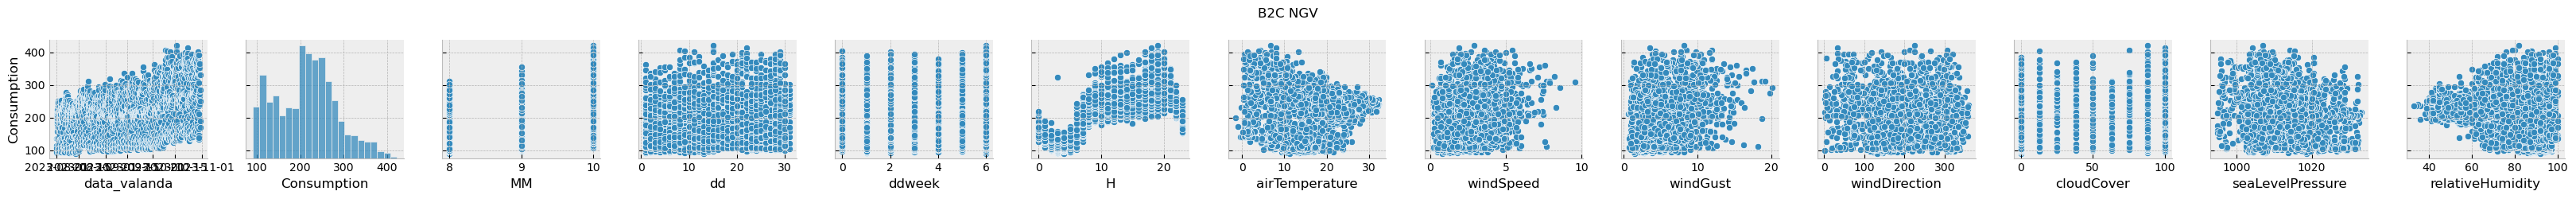

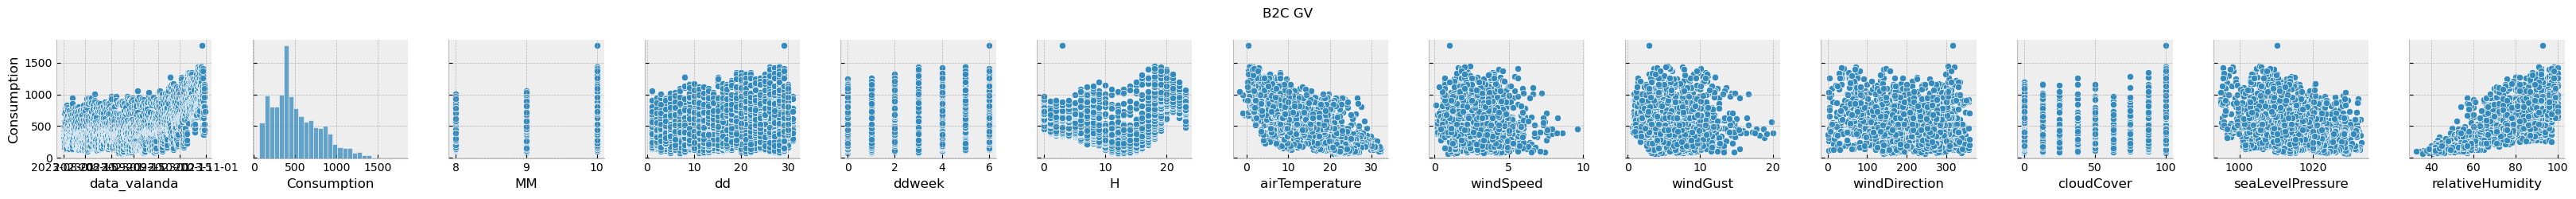

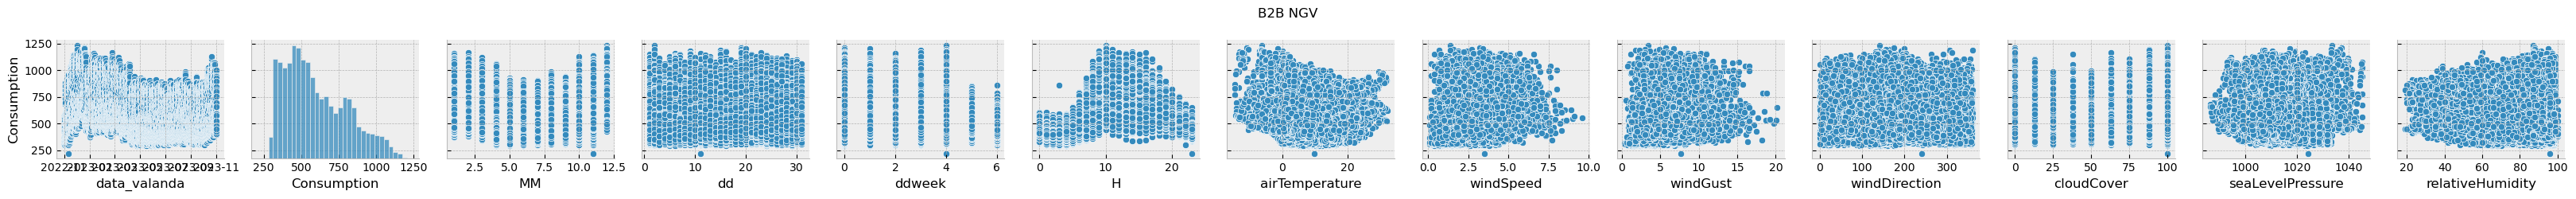

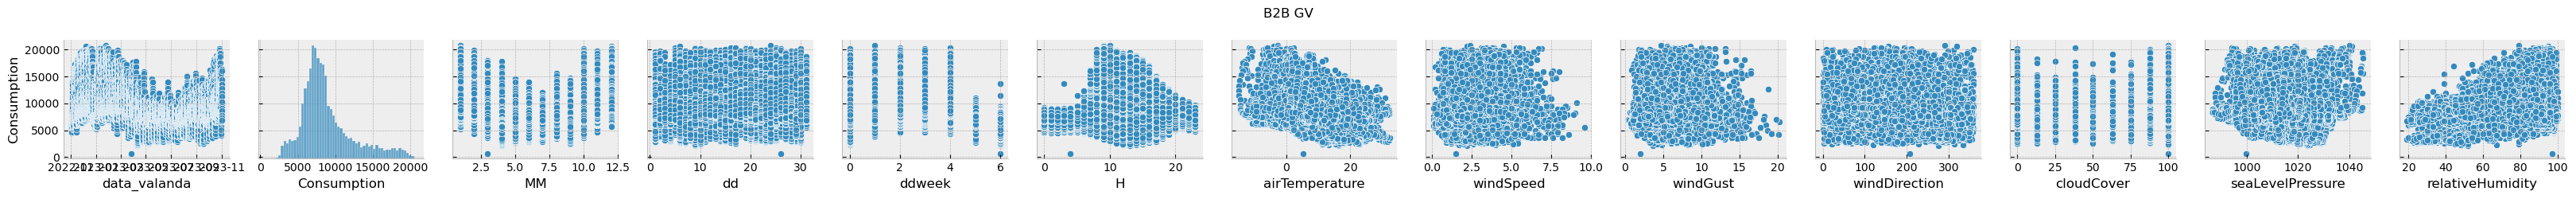

In [17]:
f1 = sns.pairplot(data=b2c_ngv, y_vars='Consumption', x_vars = [x for x in list(b2c_ngv.columns) if x not in ['feelsLikeTemperature', 'YY', 'precipitation', 'conditionCode', 'Unnamed: 0', 'observationTimeUtc']])
f2 = sns.pairplot(data=b2c_gv, y_vars='Consumption', x_vars = [x for x in list(b2c_gv.columns) if x not in ['feelsLikeTemperature', 'YY', 'precipitation', 'conditionCode', 'Unnamed: 0', 'observationTimeUtc']])
f3 = sns.pairplot(data=b2b_ngv, y_vars='Consumption', x_vars = [x for x in list(b2b_ngv.columns) if x not in ['feelsLikeTemperature', 'YY', 'precipitation', 'conditionCode', 'Unnamed: 0', 'observationTimeUtc']])
f4 = sns.pairplot(data=b2b_gv, y_vars='Consumption', x_vars = [x for x in list(b2c_gv.columns) if x not in ['feelsLikeTemperature', 'YY', 'precipitation', 'conditionCode', 'Unnamed: 0', 'observationTimeUtc']])
f1.fig.suptitle('B2C NGV')
f1.fig.tight_layout()
f2.fig.suptitle('B2C GV')
f2.fig.tight_layout()
f3.fig.suptitle('B2B NGV')
f3.fig.tight_layout()
f4.fig.suptitle('B2B GV')
f4.fig.tight_layout()
plt.show()

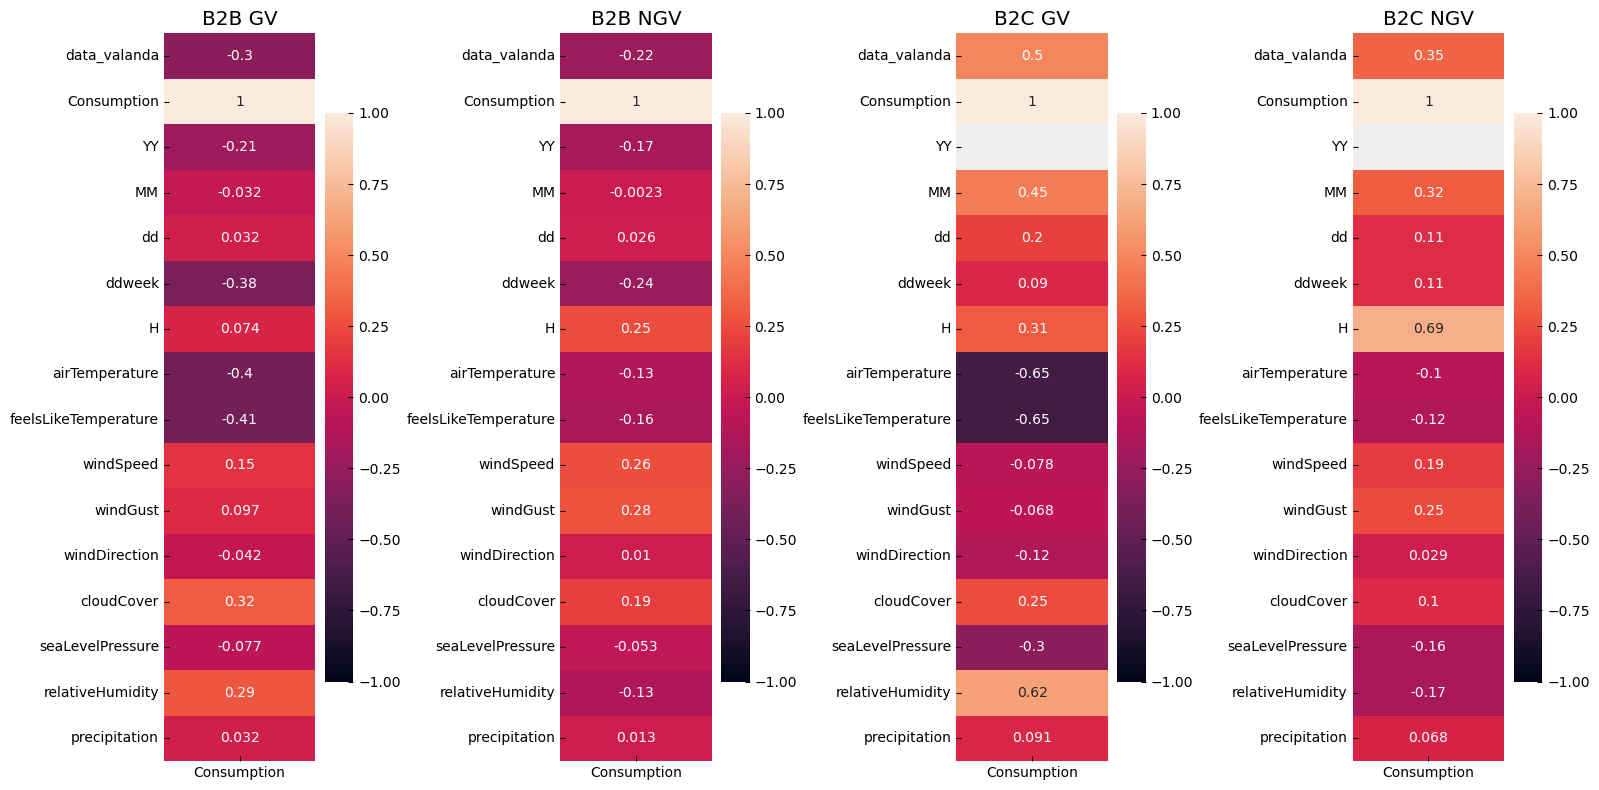

In [18]:
fig, (ax, ax2, ax3, ax4) = plt.subplots(1,4,figsize=[16,8])
sns.heatmap(data=b2b_gv.drop(columns=['conditionCode', 'observationTimeUtc','Unnamed: 0']).corr()['Consumption'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax)
ax.set_title('B2B GV')
sns.heatmap(data=b2b_ngv.drop(columns=['conditionCode', 'observationTimeUtc','Unnamed: 0']).corr()['Consumption'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax2)
ax2.set_title('B2B NGV')
sns.heatmap(data=b2c_gv.drop(columns=['conditionCode', 'observationTimeUtc','Unnamed: 0']).corr()['Consumption'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax3)
ax3.set_title('B2C GV')
sns.heatmap(data=b2c_ngv.drop(columns=['conditionCode', 'observationTimeUtc','Unnamed: 0']).corr()['Consumption'].to_frame(), vmin=-1, vmax=1, annot=True, ax=ax4)
ax4.set_title('B2C NGV')
fig.tight_layout()
plt.show()

In [19]:
#  Klausimai:
# Gaminantys vartotojai - jie gamina energiją iš kokio šaltinio? Kodėl taip manote?
# Kokius parametrus atrinkote į ML modelius ir kodėl?
# ką darėte su trūkstamais duomenimis (in general, trūksta 99 proc. vartotojų duomenų?)


In [20]:
# Modeliai - 4-ri modeliai 4-rioms grupėms
# Kiekvienai grupei taikomi skirtingi stulpeliai
# Demonstraciniams tikslams - vienas ML modelis
#  renkamasi iš RandomForestRegressor ir DecisionTreeRegressor
# Tegul būna RandomForestRegressor

In [21]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import mean_squared_error

# Modelis B2B GV:
c_b2b_cv = ['YY', "MM",'dd','ddweek','H','airTemperature', 'windSpeed', 'cloudCover', 'relativeHumidity']

X_train = b2b_gv[c_b2b_cv].iloc[:-24,:]; X_train.head()
X_train['cloudCover'].fillna(X_train['cloudCover'].mean(), inplace=True)
X_train.isna().sum()

y_train = b2b_gv['Consumption'][:-24]; y_train

X_test = b2b_gv[c_b2b_cv].iloc[-24:,:]
y_test = b2b_gv['Consumption'][-24:]

rfr_b2b_gv = RFR()
# treniravimas:
rfr_b2b_gv.fit(X_train, y_train)


RandomForestRegressor()

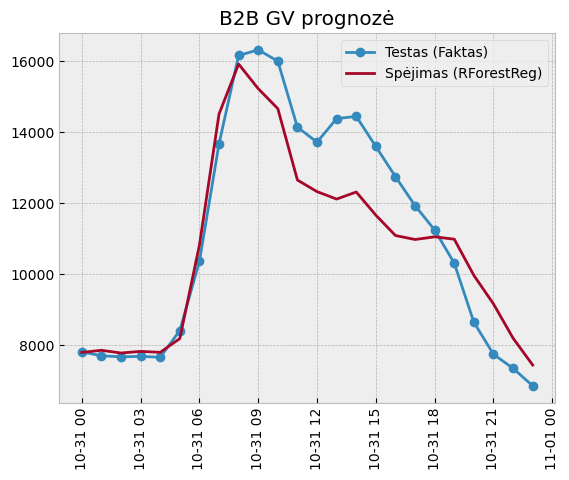

In [22]:
y_pred = rfr_b2b_gv.predict(X_test)

X_test_datos = b2b_gv['data_valanda'][-24:]
#Iškart vizualizuojam predicted bei faktą:
fig, ax = plt.subplots()
ax.plot(X_test_datos, y_test, label='Testas (Faktas)', marker='o')
ax.plot(X_test_datos, y_pred, label='Spėjimas (RForestReg)')
ax.set_title('B2B GV prognozė')
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')
plt.show()

In [23]:
# Modelis B2B NGV atveju
c_b2b_ncv = ['YY','MM','dd','ddweek','H', 'airTemperature', 'windSpeed', 'windGust', 'cloudCover', 'relativeHumidity']

X_train_ngv = b2b_ngv[c_b2b_ncv].iloc[:-24,:]; X_train.head()
X_train_ngv['cloudCover'].fillna(X_train_ngv['cloudCover'].mean(), inplace=True)
# print(X_train_ngv.isna().sum())

y_train_ngv = b2b_ngv['Consumption'][:-24]; y_train_ngv

X_test_ngv = b2b_ngv[c_b2b_ncv].iloc[-24:,:]
y_test_ngv = b2b_ngv['Consumption'][-24:]

rfr_b2b_ngv = RFR()
# treniravimas:
rfr_b2b_ngv.fit(X_train_ngv, y_train_ngv)


RandomForestRegressor()

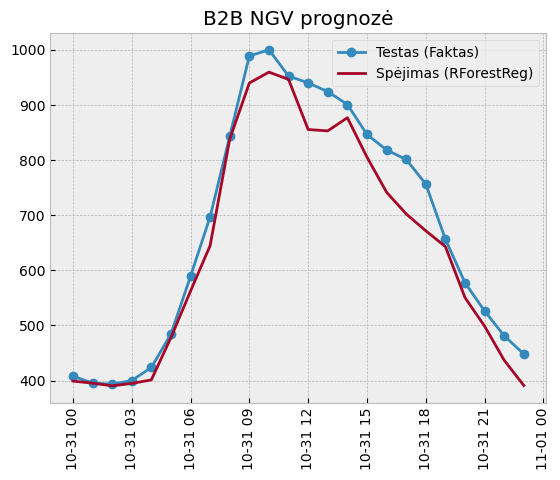

In [24]:
y_pred_ngv = rfr_b2b_ngv.predict(X_test_ngv)

X_test_datos_ngv = b2b_ngv['data_valanda'][-24:]
#Iškart vizualizuojam predicted bei faktą:
fig, ax = plt.subplots()
ax.plot(X_test_datos_ngv, y_test_ngv, label='Testas (Faktas)', marker='o')
ax.plot(X_test_datos_ngv, y_pred_ngv, label='Spėjimas (RForestReg)')
ax.set_title('B2B NGV prognozė')
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')
plt.show()

In [25]:
# Modelis B2C GV vartotojams:
c_b2c_gv = ['MM','dd','ddweek','H', 'airTemperature', 'windDirection', 'cloudCover', 'seaLevelPressure', 'relativeHumidity']

X_train_bc_gv = b2c_gv[c_b2c_gv].iloc[:-24,:]; X_train_bc_gv.head()
X_train_bc_gv['cloudCover'].fillna(X_train_bc_gv['cloudCover'].mean(), inplace=True)
# print(X_train_bc_gv.isna().sum())

y_train_bc_gv = b2c_gv['Consumption'][:-24]

X_test_bc_gv = b2c_gv[c_b2c_gv].iloc[-24:,:]
y_test_bc_gv = b2c_gv['Consumption'][-24:]

rfr_b2c_gv = RFR()
# treniravimas:
rfr_b2c_gv.fit(X_train_bc_gv, y_train_bc_gv)

RandomForestRegressor()

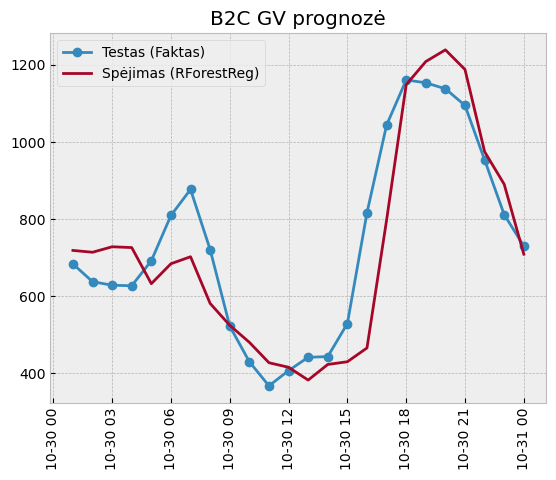

In [26]:
y_pred_bc_gv = rfr_b2c_gv.predict(X_test_bc_gv)

X_test_datos_bc_gv = b2c_gv['data_valanda'][-24:]
#Iškart vizualizuojam predicted bei faktą:
fig, ax = plt.subplots()
ax.plot(X_test_datos_bc_gv, y_test_bc_gv, label='Testas (Faktas)', marker='o')
ax.plot(X_test_datos_bc_gv, y_pred_bc_gv, label='Spėjimas (RForestReg)')
ax.set_title('B2C GV prognozė')
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')
plt.show()

In [27]:
#Modelis B2C NGV vartotojams
c_b2c_ngv = ['MM','dd','ddweek','H', 'airTemperature', 'windSpeed', 'windGust', 'cloudCover', 'seaLevelPressure', 'relativeHumidity']

X_train_bc_ngv = b2c_ngv[c_b2c_ngv].iloc[:-24,:]; X_train_bc_ngv.head()
X_train_bc_ngv['cloudCover'].fillna(X_train_bc_ngv['cloudCover'].mean(), inplace=True)
# print(X_train_bc_ngv.isna().sum())

y_train_bc_ngv = b2c_ngv['Consumption'][:-24]

X_test_bc_ngv = b2c_ngv[c_b2c_ngv].iloc[-24:,:]
y_test_bc_ngv = b2c_ngv['Consumption'][-24:]

rfr_b2c_ngv = RFR()
# treniravimas:
rfr_b2c_ngv.fit(X_train_bc_ngv, y_train_bc_ngv)


RandomForestRegressor()

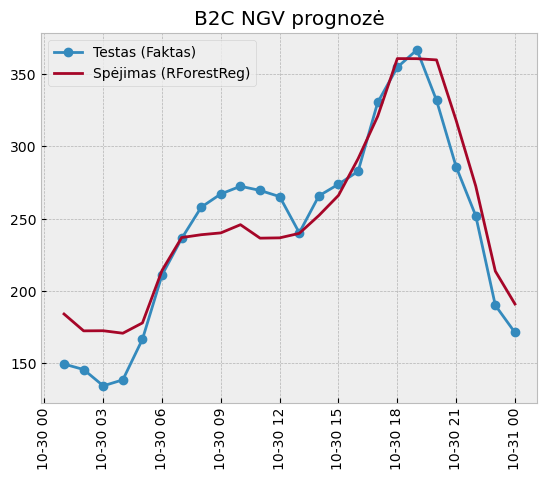

In [28]:
y_pred_bc_ngv = rfr_b2c_ngv.predict(X_test_bc_ngv)

X_test_datos_bc_ngv = b2c_ngv['data_valanda'][-24:]
#Iškart vizualizuojam predicted bei faktą:
fig, ax = plt.subplots()
ax.plot(X_test_datos_bc_ngv, y_test_bc_ngv, label='Testas (Faktas)', marker='o')
ax.plot(X_test_datos_bc_ngv, y_pred_bc_ngv, label='Spėjimas (RForestReg)')
ax.set_title('B2C NGV prognozė')
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')
plt.show()

In [29]:
# Turime 4-ris ML modelius 4-rioms vartotojų grupėms
# ML modeliai apmokinti naudojant SKIRTINGUS stulpelius
# funkcija gauti norimos dienos orų (istorinius!!!) duomenis
def getWeather(d:str) -> pd.DataFrame:
    url = 'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/{d}'
    r = requests.get(url.format(d=d))
    a = r.json()
    df = pd.DataFrame(data=a['observations'])
    df['data_valanda'] = pd.to_datetime(df['observationTimeUtc'])
    df['YY'] = df['data_valanda'].dt.year
    df['MM'] = df['data_valanda'].dt.month
    df['dd'] = df['data_valanda'].dt.day
    df['ddweek'] = df['data_valanda'].dt.day_of_week
    df['H'] = df['data_valanda'].dt.hour
    df['cloudCover'].fillna(df['cloudCover'].mean(), inplace=True)
    df.drop(columns=['observationTimeUtc'], inplace=True)
    return df
    pass



# Funkcija, skirta bendrai sumai (4-rių grupių energijos suvartojimui) rasti:

def getTotalConsumption(testDay):
    '''
    testDay : pd.DataFrame() su 24-rių valandų orų prognoze ir laikais
    Iš jos atsirenkami norimi stulpeliai, pateikiama modeliams, gaunamas rezultatas
    Modeliai, stulpelių sąrašai - globalūs kintamieji(!, wrong approach!)    
    Grąžinama: DF su kiekvieną valandą prognozuojamu el. energijos suvartojimu.
    '''
    
    predict_b2b_gv = rfr_b2b_gv.predict(testDay[c_b2b_cv])
    predict_b2b_ngv = rfr_b2b_ngv.predict(testDay[c_b2b_ncv])
    predict_b2c_gv = rfr_b2c_gv.predict(testDay[c_b2c_gv])
    predict_b2c_ngv = rfr_b2c_ngv.predict(testDay[c_b2c_ngv])
    s = predict_b2b_gv+predict_b2b_ngv+predict_b2c_gv+predict_b2c_ngv    
    return s
    pass

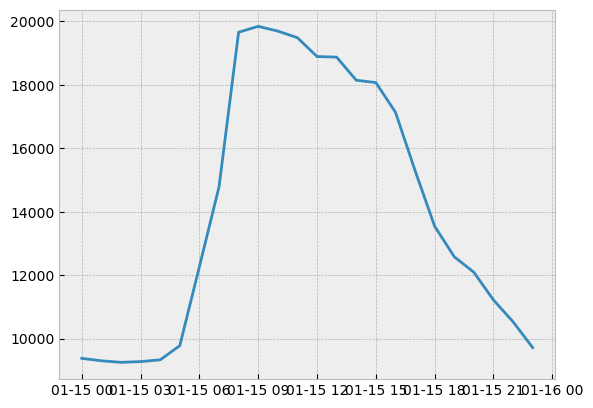

In [30]:
air = getWeather('2025-01-15')
prognoze = getTotalConsumption(air)

fig, ax = plt.subplots()
ax.plot(air['data_valanda'], prognoze)

plt.show()

In [31]:
# 2023-10-31 dienos energijos suvartojimas kas valandą (suma iš exelio failų)
# df[(df['data_valanda'].dt.month == month)& (df['data_valanda'].dt.day == day)]
b2bgvs = b2b_gv[(b2b_gv['data_valanda'].dt.month == 10)& (b2b_gv['data_valanda'].dt.day == 31)]['Consumption'].values
b2bngvs = b2b_ngv[(b2b_ngv['data_valanda'].dt.month == 10)& (b2b_ngv['data_valanda'].dt.day == 31)]['Consumption'].values
b2cgvs = b2c_gv[(b2c_gv['data_valanda'].dt.month == 10)& (b2c_gv['data_valanda'].dt.day == 31)]['Consumption'].values
b2cngvs = b2c_ngv[(b2c_ngv['data_valanda'].dt.month == 10)& (b2c_ngv['data_valanda'].dt.day == 31)]['Consumption'].values
sums = b2bgvs+b2bngvs+b2cgvs+b2cngvs
# print(sums)

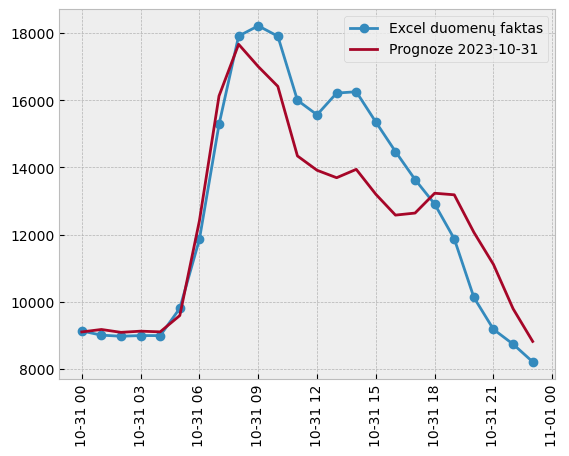

In [32]:
air = getWeather('2023-10-31')
prognoze = getTotalConsumption(air)

fig, ax = plt.subplots()

ax.plot(air['data_valanda'], sums, label='Excel duomenų faktas', marker='o')
ax.plot(air['data_valanda'], prognoze, label='Prognoze 2023-10-31')
ax.legend(loc='best')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [33]:
# testinės prognozės įverčiai:
# Įverčiai:
r2 = r2_score(sums, prognoze)
# r2_score < 0? Tai reiškia, kad modelis spėja blogiau
#  nei tiesiog paimtumėme vidurkius
mae = mean_absolute_error(sums, prognoze)
mse = mean_squared_error(sums, prognoze)
c = np.corrcoef(sums,prognoze)
rmse = root_mean_squared_error(sums,prognoze)
print(f'R2={r2:0.3f}\nMAE={mae:0.3f}\nMSE={mse:0.3f}')
print(f'C={c}')
print(f'RMSE={rmse:0.3f}')

R2=0.849
MAE=1060.819
MSE=1751461.417
C=[[1.         0.93741241]
 [0.93741241 1.        ]]
RMSE=1323.428


In [34]:
# 8398474.548720269 kWh 
8398474.548720269/1017000000

0.008258087068554836

In [35]:
npoolData = [1257,1222,1221.5,1224,1270.3,1476.8,1699.8,1837,1901.5,1931.5,1942.3,1902.8,1899,1858.8,1838.8,1841.5,1863.3,1854.5,1814,1758.3,1667.8,1535.8,1405,1004]
print(len(npoolData))
#NordPool duomenys - MWh!, gali būti klaida - imama ne ta valanda kaip pirma, 
# bet esmės/formos
# prognozės tai nekeičia.

24


24


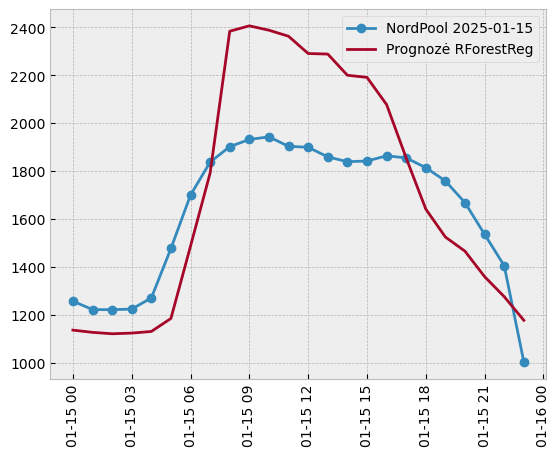

In [36]:
air = getWeather('2025-01-15')
prognoze = getTotalConsumption(air)
print(len(air['data_valanda']))
koregProg = prognoze/0.00825/1e3 #Prognozėje laikome, jog kWh
# tada atliekama konversija kWh => MWh : [MWh] ~ [kWh]/1000 (sumažindami skaičių, padidiname matavimo vienetus
# ta pačia eile)
#  dalyba iš 0.00825 - nes ekselio failuose bendras spalio
# suvartojimas tėra 0.00825 nuo visos LT suvartotos el. energijos (1017 GWh)
# perskaičiuojame visai LT, laikant, jog Ekselyje esančios grupės tinkamai atspindi
# visos LT vartotojus
fig, ax = plt.subplots()
ax.plot(air['data_valanda'], npoolData, label='NordPool 2025-01-15', marker='o')
ax.plot(air['data_valanda'], koregProg, label='Prognozė RForestReg') 

ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')
plt.show()

In [37]:
# Įverčiai:
r2 = r2_score(npoolData, koregProg)
# r2_score < 0? Tai reiškia, kad modelis spėja blogiau
#  nei tiesiog paimtumėme vidurkius
mae = mean_absolute_error(npoolData, koregProg)
mse = mean_squared_error(npoolData, koregProg)
c = np.corrcoef(npoolData,koregProg)
rmse = root_mean_squared_error(npoolData,koregProg)
print(f'R2={r2:0.3f}\nMAE={mae:0.3f}\nMSE={mse:0.3f}')
print(f'C={c}')
print(f'RMSE={rmse:0.3f}')

R2=0.049
MAE=241.517
MSE=79082.451
C=[[1.         0.88821068]
 [0.88821068 1.        ]]
RMSE=281.216


In [ ]:
# Užduotis - paskaičiuoti geriausio modelio spėjimo įverčius (R2 score, etc), lyginannt spėjimą su NordPool
# faktu.

# Užduotis - parašyti skriptą, kuris pateiktų prognozę tiesiog skaičiuodamas vidutines vertes (pagal vidurkius)
# Palyginkite šio skripto prognozės tikslumą su dviem savo geriausiais modeliais 
# (pagal koreliacijos koef, R2 score, MAE, MSE, RMSE ...)

# Užduotis: sudalyvauti čia: https://www.kaggle.com/competitions/titanic/overview/evaluation

